In [46]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

In [47]:
data = pd.read_csv('train.csv')
data_te = pd.read_csv('test.csv')

data = data.drop('id', axis=1)
data_te = data_te.drop('id',axis=1)

In [48]:
data.head()

,x,y
0,5.551968,0.119105
1,5.997389,0.402945
2,10.198015,-0.160651
3,6.029682,-0.384014
4,8.186754,-0.160144


In [49]:
data_te.head()

,x
0,8.078316
1,7.848030
2,7.125484
3,-0.058594
4,0.041775


In [50]:
res = {}

# Plots

### Scatter

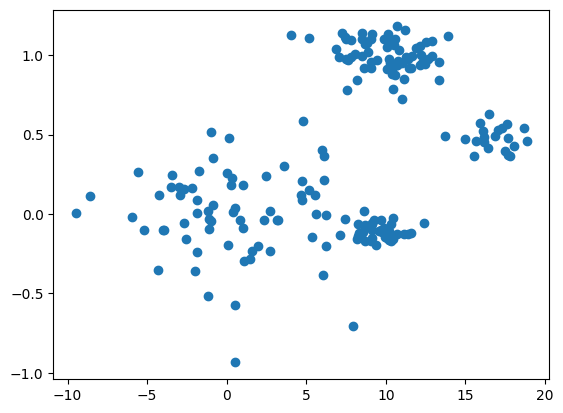

In [51]:
plt.scatter(data['x'], data['y'])

<Axes: xlabel='x', ylabel='y'>

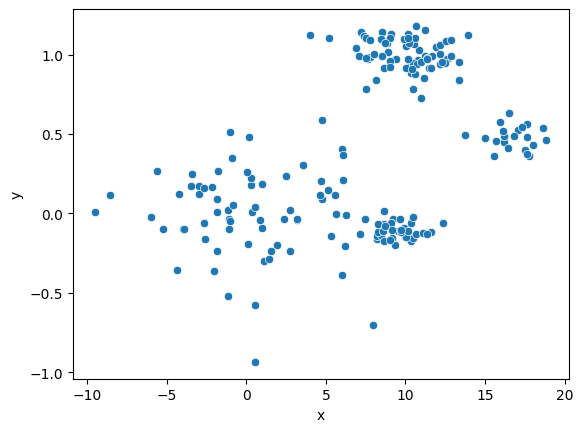

In [52]:
sns.scatterplot(x = data['x'], y = data['y'], data=data)

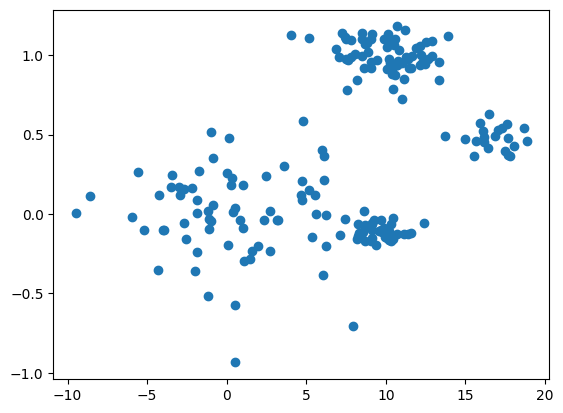

In [53]:
plt.scatter(data['x'], (data['y']))

### Hist

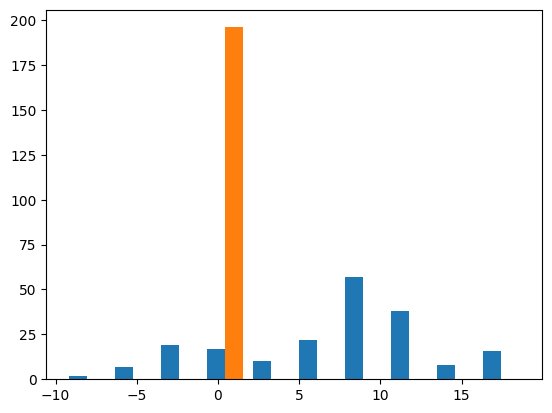

In [54]:
_ = plt.hist(data)

<Axes: ylabel='Count'>

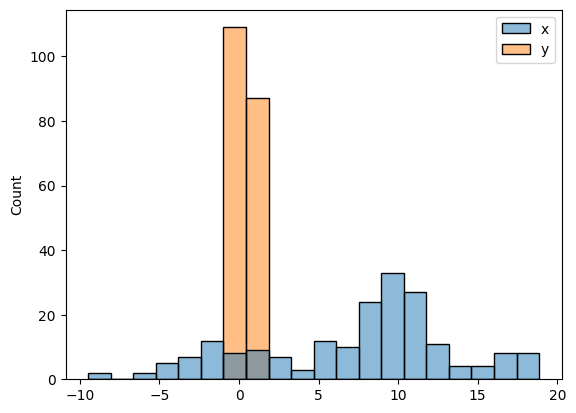

In [55]:
sns.histplot(data=data, bins=20)

# Split data

In [56]:
from sklearn.model_selection import train_test_split
x_tr, x_te, y_tr, y_te = train_test_split(data['x'].values, data['y'].values, test_size = 0.2, random_state = 14)

In [57]:
x_tr = x_tr.reshape(-1, 1)
x_te = x_te.reshape(-1, 1)

# Linear regression

In [58]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_tr, y_tr)

LinearRegression()

In [59]:
pred_lr = lr.predict(x_te)

In [60]:
pred_lr

array([-0.26510337,  0.05028887,  0.4863522 ,  0.12529438,  0.04663414,
        0.73972015,  0.51006732,  0.12503681,  0.04667988,  0.47358386,
        0.35128167, -0.07340399,  0.64592342,  0.2642884 ,  0.54949101,
        0.47771295,  0.47533837,  0.52184668,  0.46219191,  0.01889301,
        0.02194684,  0.47079992,  0.35343642,  0.37820213, -0.04158405,
        0.5072441 ,  0.35741719, -0.10584684, -0.12029094,  0.10763898,
        0.42760817,  0.51197836,  0.42471104,  0.52025652,  0.17503034,
        0.46972087,  0.20706085,  0.01831665,  0.10731337,  0.05494191])

In [61]:
mean_absolute_error(pred_lr, y_te)

0.3859008151703762

In [62]:
res['linear_reg'] = mean_absolute_error(pred_lr, y_te)

# Ridge regression

In [63]:
from sklearn.linear_model import Ridge
rr = Ridge()
rr.fit(x_tr, y_tr)

Ridge()

In [64]:
pred_rr = rr.predict(x_te)

In [65]:
pred_rr

array([-0.26497806,  0.05035313,  0.48633205,  0.12534412,  0.04669911,
        0.73965097,  0.51004259,  0.12508661,  0.04674484,  0.47356619,
        0.35128767, -0.07331579,  0.64587239,  0.26431124,  0.54945864,
        0.47769448,  0.47532036,  0.52181967,  0.46217645,  0.01896335,
        0.02201659,  0.47078278,  0.35344201,  0.37820292, -0.041502  ,
        0.50721991,  0.357422  , -0.10575236, -0.12019366,  0.10769214,
        0.42759939,  0.51195326,  0.42470283,  0.52022981,  0.17507045,
        0.46970394,  0.20709477,  0.0183871 ,  0.1073666 ,  0.05500527])

In [66]:
mean_absolute_error(pred_rr, y_te)

0.3858970036697582

In [67]:
res['Ridge'] = mean_absolute_error(pred_rr, y_te)

# Find hyperparameters

In [68]:
from sklearn.metrics import mean_absolute_error
log_alpha = {}
def al(a):
    ridge_model_1 = Ridge(alpha=a)
    ridge_model_1.fit(x_tr, y_tr)
    res_ridge_1 = ridge_model_1.predict(x_te)
    mean_absolute_error_ridge_1 = mean_absolute_error(y_te, res_ridge_1)
    log_alpha[a] = mean_absolute_error_ridge_1

In [69]:
for n in range(0,1000, 50):
    for i in np.linspace(0, 1, num=n):
        al(i)

In [70]:
for key in log_alpha.keys():
    if log_alpha[key] == min(log_alpha.values()):
        print("Min значення mae = {v}, alpha = {k}".format(k = key, v = log_alpha[key]))
        break

Min значення mae = 0.3858970036697582, alpha = 1.0


# Ridge with alpha

In [71]:
from sklearn.linear_model import Ridge
rr_alpha = Ridge(alpha=1)
rr_alpha.fit(x_tr, y_tr)

Ridge(alpha=1)

In [72]:
pred_rr_alpha = rr_alpha.predict(x_te)

In [73]:
pred_rr_alpha

array([-0.26497806,  0.05035313,  0.48633205,  0.12534412,  0.04669911,
        0.73965097,  0.51004259,  0.12508661,  0.04674484,  0.47356619,
        0.35128767, -0.07331579,  0.64587239,  0.26431124,  0.54945864,
        0.47769448,  0.47532036,  0.52181967,  0.46217645,  0.01896335,
        0.02201659,  0.47078278,  0.35344201,  0.37820292, -0.041502  ,
        0.50721991,  0.357422  , -0.10575236, -0.12019366,  0.10769214,
        0.42759939,  0.51195326,  0.42470283,  0.52022981,  0.17507045,
        0.46970394,  0.20709477,  0.0183871 ,  0.1073666 ,  0.05500527])

In [74]:
mean_absolute_error(pred_rr_alpha, y_te)

0.3858970036697582

In [75]:
res['ridge_alpha'] = mean_absolute_error(pred_rr_alpha, y_te)

# Polynomial reg

In [76]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=4)
model_poly_4 = make_pipeline(poly, rr_alpha)
model_poly_4.fit(x_tr, y_tr)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('ridge', Ridge(alpha=1))])

In [77]:
make_pipeline(PolynomialFeatures(degree=4), rr_alpha)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=4)),
                ('ridge', Ridge(alpha=1))])

In [78]:
pred_model_poly_4 = model_poly_4.predict(x_te)
mean_absolute_error(pred_model_poly_4, y_te)

res['poly_4'] = mean_absolute_error(pred_model_poly_4, y_te)

# 3d

In [79]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=3)
model_poly_3 = make_pipeline(poly, rr_alpha)
model_poly_3.fit(x_tr, y_tr)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=1))])

In [80]:
pred_model_poly_3 = model_poly_3.predict(x_te)
mean_absolute_error(pred_model_poly_3, y_te)
res['poly_3'] = mean_absolute_error(pred_model_poly_3, y_te)

# 2d

In [81]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=3)
model_poly_2 = make_pipeline(poly, rr_alpha)
model_poly_2.fit(x_tr, y_tr)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('ridge', Ridge(alpha=1))])

In [82]:
pred_model_poly_2 = model_poly_2.predict(x_te)
mean_absolute_error(pred_model_poly_2, y_te)
res['poly_2'] = mean_absolute_error(pred_model_poly_2, y_te)

# 5d

In [83]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly = PolynomialFeatures(degree=5)
model_poly_5 = make_pipeline(poly, rr_alpha)
model_poly_5.fit(x_tr, y_tr)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=5)),
                ('ridge', Ridge(alpha=1))])

In [84]:
pred_model_poly_5 = model_poly_5.predict(x_te)
mean_absolute_error(pred_model_poly_5, y_te)
res['poly_5'] = mean_absolute_error(pred_model_poly_5, y_te)

# 6d

In [85]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.metrics import mean_squared_error

poly = PolynomialFeatures(degree=6)
model_poly_6 = make_pipeline(poly, rr_alpha)
model_poly_6.fit(x_tr, y_tr)

C:\Users\thien\miniconda3\Lib\site-packages\sklearn\linear_model\_ridge.py:204: LinAlgWarning: Ill-conditioned matrix (rcond=8.39859e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=6)),
                ('ridge', Ridge(alpha=1))])

In [86]:
pred_model_poly_6 = model_poly_6.predict(x_te)
print(mean_absolute_error(pred_model_poly_6, y_te))
res['poly_6'] = mean_absolute_error(pred_model_poly_6, y_te)

0.3520076811536649


# Random Forest

In [87]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(x_tr, y_tr)

RandomForestRegressor()

In [88]:
pred_rfr = rfr.predict(x_te)
print(mean_absolute_error(pred_rfr, y_te))
res['random_forest'] = mean_absolute_error(pred_rfr, y_te)

0.4171558799533365


# random forest - with parameters

In [90]:
from sklearn.ensemble import RandomForestRegressor

rfr_1 = RandomForestRegressor(criterion = 'absolute_error', max_depth=3)
rfr_1.fit(x_tr, y_tr)

RandomForestRegressor(criterion='absolute_error', max_depth=3)

In [91]:
pred_rfr_1 = rfr_1.predict(x_te)
print(mean_absolute_error(pred_rfr_1, y_te))
res['random_forest_1'] = mean_absolute_error(pred_rfr_1, y_te)

0.3230421841623808


In [92]:
from sklearn.ensemble import RandomForestRegressor

rfr_2 = RandomForestRegressor(criterion = 'absolute_error', max_depth=3)
rfr_2.fit(x_tr, y_tr)

RandomForestRegressor(criterion='absolute_error', max_depth=3)

In [93]:
pred_rfr_2 = rfr_2.predict(x_te)
print(mean_absolute_error(pred_rfr_2, y_te))
res['random_forest_2'] = mean_absolute_error(pred_rfr_2, y_te)

0.3260311652273379


In [94]:
# test_9 = (rfr_2.predict(data.values) + rfr_1.predict(data.values)) / 2

In [95]:
print(mean_absolute_error(test_9, y_te))

NameError: name 'test_9' is not defined

# Decision Tree reg

In [96]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor()
dtr.fit(x_tr, y_tr)

DecisionTreeRegressor()

In [97]:
pred_dtr = dtr.predict(x_te)
print(mean_absolute_error(pred_dtr, y_te))
res['decision_tree'] = mean_absolute_error(pred_dtr, y_te)

0.43395254089338264


# Decision Tree with params

In [98]:
from sklearn.tree import DecisionTreeRegressor

dtr_1 = DecisionTreeRegressor(criterion = 'absolute_error', max_depth = 6, min_samples_split = 10, min_samples_leaf = 2, max_features='log2')
dtr_1.fit(x_tr, y_tr)

DecisionTreeRegressor(criterion='absolute_error', max_depth=6,
                      max_features='log2', min_samples_leaf=2,
                      min_samples_split=10)

In [99]:
pred_dtr_1 = dtr_1.predict(x_te)
print(mean_absolute_error(pred_dtr_1, y_te))
res['decision_tree_1'] = mean_absolute_error(pred_dtr_1, y_te)

0.3603570392604731


# Gradient Boosting Regressor


In [100]:
from sklearn.ensemble import GradientBoostingRegressor


gbr = GradientBoostingRegressor()
gbr.fit(x_tr, y_tr)

GradientBoostingRegressor()

In [101]:
pred_gbr = gbr.predict(x_te)
print(mean_absolute_error(pred_gbr, y_te))
res['GradientBoostingRegressor'] = mean_absolute_error(pred_gbr, y_te)

0.3835879854325742


In [102]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742}

# Bayesian Ridge Regression

In [103]:
from sklearn.linear_model import BayesianRidge

brr = BayesianRidge(compute_score=True)
brr.fit(x_tr, y_tr)

BayesianRidge(compute_score=True)

In [104]:
pred_brr = brr.predict(x_te)
print(mean_absolute_error(pred_brr, y_te))
res['BayesianRidgeRegression'] = mean_absolute_error(pred_brr, y_te)

0.38561848324172965


# Support Vector Regression

In [105]:
from sklearn.svm import SVR

svr = SVR()
svr.fit(x_tr, y_tr)

SVR()

In [129]:
pred_svr = svr.predict(x_te)
print(mean_absolute_error(pred_svr, y_te))
res['SVR'] = mean_absolute_error(pred_svr, y_te)

0.3249692352695204


# XGB Regressor

In [107]:
import xgboost as xgb


xgb = xgb.XGBRegressor()
xgb.fit(x_tr, y_tr)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [108]:
pred_xgb = xgb.predict(x_te)
print(mean_absolute_error(pred_xgb, y_te))
res['XGB_Regressor'] = mean_absolute_error(pred_xgb, y_te)

0.4453554483196829


# LGBMRegressor

In [109]:
from lightgbm import LGBMRegressor

lgbmr = LGBMRegressor(objective='regression')
lgbmr.fit(x_tr, y_tr)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001042 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 1
[LightGBM] [Info] Start training from score 0.382286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

LGBMRegressor(objective='regression')

In [110]:
pred_lgbmr = lgbmr.predict(x_te)
print(mean_absolute_error(pred_lgbmr, y_te))
res['LGBMRegressor'] = mean_absolute_error(pred_lgbmr, y_te)

0.37545356782948425


In [111]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742,
 'BayesianRidgeRegression': 0.38561848324172965,
 'XGB_Regressor': 0.4453554483196829,
 'LGBMRegressor': 0.37545356782948425}

# StackingRegressor

In [112]:
from mlxtend.regressor import StackingRegressor

sr = StackingRegressor(regressors=(Ridge(alpha = 1),
                                          LGBMRegressor(objective='regression'),
                                          GradientBoostingRegressor()),
                              meta_regressor = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha = 1)),
                              use_features_in_secondary = True)
sr.fit(x_tr, y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000146 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 1
[LightGBM] [Info] Start training from score 0.382286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingRegressor(meta_regressor=Pipeline(steps=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=4)),
                                                 ('ridge', Ridge(alpha=1))]),
                  regressors=(Ridge(alpha=1),
                              LGBMRegressor(objective='regression'),
                              GradientBoostingRegressor()),
                  use_features_in_secondary=True)

In [113]:
pred_sr = sr.predict(x_te)
print(mean_absolute_error(pred_sr, y_te))
res['StackingRegressor'] = mean_absolute_error(pred_sr, y_te)

0.410808002495944


In [114]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742,
 'BayesianRidgeRegression': 0.38561848324172965,
 'XGB_Regressor': 0.4453554483196829,
 'LGBMRegressor': 0.37545356782948425,
 'StackingRegressor': 0.410808002495944}

# StackingRegressor_1

In [115]:
from mlxtend.regressor import StackingRegressor

sr_1 = StackingRegressor(regressors=(Ridge(alpha = 1),
                                          LGBMRegressor(objective='regression'),
                                          GradientBoostingRegressor(),
                                    BayesianRidge()),
                              meta_regressor = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha = 1)),
                              use_features_in_secondary = True)
sr_1.fit(x_tr, y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000684 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 1
[LightGBM] [Info] Start training from score 0.382286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingRegressor(meta_regressor=Pipeline(steps=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=4)),
                                                 ('ridge', Ridge(alpha=1))]),
                  regressors=(Ridge(alpha=1),
                              LGBMRegressor(objective='regression'),
                              GradientBoostingRegressor(), BayesianRidge()),
                  use_features_in_secondary=True)

In [116]:
pred_sr_1 = sr_1.predict(x_te)
print(mean_absolute_error(pred_sr_1, y_te))
res['StackingRegressor_1'] = mean_absolute_error(pred_sr_1, y_te)

0.41085420146504636


In [117]:
!pip install catboost

# CatBoostRegressor())

In [118]:
from catboost import CatBoostRegressor

catb = CatBoostRegressor()
catb.fit(x_tr, y_tr)

Learning rate set to 0.030528
0:	learn: 0.5049393	total: 159ms	remaining: 2m 38s
1:	learn: 0.5013763	total: 160ms	remaining: 1m 20s
2:	learn: 0.4979162	total: 162ms	remaining: 53.7s
3:	learn: 0.4945174	total: 163ms	remaining: 40.5s
4:	learn: 0.4913372	total: 164ms	remaining: 32.6s
5:	learn: 0.4879184	total: 165ms	remaining: 27.3s
6:	learn: 0.4844591	total: 166ms	remaining: 23.5s
7:	learn: 0.4818586	total: 167ms	remaining: 20.7s
8:	learn: 0.4792656	total: 168ms	remaining: 18.5s
9:	learn: 0.4763516	total: 169ms	remaining: 16.7s
10:	learn: 0.4743536	total: 170ms	remaining: 15.3s
11:	learn: 0.4720073	total: 171ms	remaining: 14s
12:	learn: 0.4696789	total: 172ms	remaining: 13s
13:	learn: 0.4672801	total: 173ms	remaining: 12.2s
14:	learn: 0.4650050	total: 174ms	remaining: 11.4s
15:	learn: 0.4630094	total: 175ms	remaining: 10.8s
16:	learn: 0.4611322	total: 176ms	remaining: 10.2s
17:	learn: 0.4590094	total: 177ms	remaining: 9.64s
18:	learn: 0.4569146	total: 178ms	remaining: 9.18s
19:	learn: 0.

In [119]:
pred_catb = catb.predict(x_te)
print(mean_absolute_error(pred_catb, y_te))
res['CatBoostRegressor'] = mean_absolute_error(pred_catb, y_te)

0.387408785993522


In [120]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742,
 'BayesianRidgeRegression': 0.38561848324172965,
 'XGB_Regressor': 0.4453554483196829,
 'LGBMRegressor': 0.37545356782948425,
 'StackingRegressor': 0.410808002495944,
 'StackingRegressor_1': 0.41085420146504636,
 'CatBoostRegressor': 0.387408785993522}

# StackingRegressor_2

In [121]:
from mlxtend.regressor import StackingRegressor

sr_2 = StackingRegressor(regressors=(Ridge(alpha = 1),
                                          LGBMRegressor(objective='regression'),
                                          GradientBoostingRegressor(),
                                     make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha = 1)),
                                    BayesianRidge()),
                              meta_regressor = CatBoostRegressor(),
                              use_features_in_secondary = True)
sr_2.fit(x_tr, y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000169 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 1
[LightGBM] [Info] Start training from score 0.382286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingRegressor(meta_regressor=<catboost.core.CatBoostRegressor object at 0x0000020B12578320>,
                  regressors=(Ridge(alpha=1),
                              LGBMRegressor(objective='regression'),
                              GradientBoostingRegressor(),
                              Pipeline(steps=[('polynomialfeatures',
                                               PolynomialFeatures(degree=4)),
                                              ('ridge', Ridge(alpha=1))]),
                              BayesianRidge()),
                  use_features_in_secondary=True)

In [122]:
pred_sr_2 = sr_2.predict(x_te)
print(mean_absolute_error(pred_sr_2, y_te))
res['StackingRegressor_2'] = mean_absolute_error(pred_sr_2, y_te)

0.42378362220847415


In [123]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742,
 'BayesianRidgeRegression': 0.38561848324172965,
 'XGB_Regressor': 0.4453554483196829,
 'LGBMRegressor': 0.37545356782948425,
 'StackingRegressor': 0.410808002495944,
 'StackingRegressor_1': 0.41085420146504636,
 'CatBoostRegressor': 0.387408785993522,
 'StackingRegressor_2': 0.42378362220847415}

# StackingRegressor_3

In [124]:
from mlxtend.regressor import StackingRegressor

sr_3 = StackingRegressor(regressors=(
                                          LGBMRegressor(objective='regression'),
                                          GradientBoostingRegressor(),
                                    RandomForestRegressor(criterion = 'absolute_error', max_depth=3),
                                    CatBoostRegressor()),
                              meta_regressor = make_pipeline(PolynomialFeatures(degree=4), Ridge(alpha = 1)),
                              use_features_in_secondary = True)
sr_3.fit(x_tr, y_tr)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000492 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 53
[LightGBM] [Info] Number of data points in the train set: 156, number of used features: 1
[LightGBM] [Info] Start training from score 0.382286
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

StackingRegressor(meta_regressor=Pipeline(steps=[('polynomialfeatures',
                                                  PolynomialFeatures(degree=4)),
                                                 ('ridge', Ridge(alpha=1))]),
                  regressors=(LGBMRegressor(objective='regression'),
                              GradientBoostingRegressor(),
                              RandomForestRegressor(criterion='absolute_error',
                                                    max_depth=3),
                              <catboost.core.CatBoostRegressor object at 0x0000020B1257AAB0>),
                  use_features_in_secondary=True)

In [125]:
pred_sr_3 = sr_3.predict(x_te)
print(mean_absolute_error(pred_sr_3, y_te))
res['StackingRegressor_3'] = mean_absolute_error(pred_sr_3, y_te)

0.4102396565772823


In [126]:
RandomForestRegressor(criterion = 'absolute_error', max_depth=3)

RandomForestRegressor(criterion='absolute_error', max_depth=3)

# Submits

In [127]:
test_1_attempt = model_poly_4.predict(data_te.values)
print(test_1_attempt)
df1 = pd.DataFrame(test_1_attempt, columns=['y'])

df1.to_csv('submit_1.csv', index_label='id') ### shit

ValueError: X has 5 features, but Ridge is expecting 7 features as input.

In [ ]:
test_2_attempt = sr.predict(data_te.values)

df2 = pd.DataFrame(test_2_attempt, columns=['y'])

df2.to_csv('submit_2.csv', index_label='id')

In [ ]:
test_3_attempt = sr_1.predict(data_te.values)

df3 = pd.DataFrame(test_3_attempt, columns=['y'])

df3.to_csv('submit_3.csv', index_label='id')

In [ ]:
test_4_attempt = (test_3_attempt + test_2_attempt) / 2

df4 = pd.DataFrame(test_4_attempt, columns=['y'])

df4.to_csv('submit_4.csv', index_label='id')

In [ ]:
test_5_attempt = catb.predict(data_te.values)

df5 = pd.DataFrame(test_5_attempt, columns=['y'])

df5.to_csv('submit_5.csv', index_label='id')

In [ ]:
test_6_attempt = sr_2.predict(data_te.values)

df6 = pd.DataFrame(test_6_attempt, columns=['y'])

df6.to_csv('submit_6.csv', index_label='id') ### shit

In [ ]:
test_7_attempt = rfr_1.predict(data_te.values)

df7 = pd.DataFrame(test_7_attempt, columns=['y'])

df7.to_csv('submit_7.csv', index_label='id')

In [ ]:
test_8_attempt = sr_3.predict(data_te.values)

df8 = pd.DataFrame(test_8_attempt, columns=['y'])

df8.to_csv('submit_8.csv', index_label='id')

In [ ]:
test_9_attempt = rfr_2.predict(data_te.values)

df9 = pd.DataFrame(test_9_attempt, columns=['y'])

df9.to_csv('submit_9.csv', index_label='id')

In [ ]:
test_10_attempt = (test_9_attempt + test_8_attempt) / 2

df10 = pd.DataFrame(test_10_attempt, columns=['y'])

df10.to_csv('submit_10.csv', index_label='id')

In [130]:
res

{'linear_reg': 0.3859008151703762,
 'Ridge': 0.3858970036697582,
 'ridge_alpha': 0.3858970036697582,
 'poly_4': 0.34749128573866733,
 'poly_3': 0.36723636589352954,
 'poly_2': 0.36723636589352954,
 'poly_5': 0.35016722753403107,
 'poly_6': 0.3520076811536649,
 'random_forest': 0.4171558799533365,
 'random_forest_1': 0.3230421841623808,
 'random_forest_2': 0.3260311652273379,
 'decision_tree': 0.43395254089338264,
 'decision_tree_1': 0.3603570392604731,
 'GradientBoostingRegressor': 0.3835879854325742,
 'BayesianRidgeRegression': 0.38561848324172965,
 'XGB_Regressor': 0.4453554483196829,
 'LGBMRegressor': 0.37545356782948425,
 'StackingRegressor': 0.410808002495944,
 'StackingRegressor_1': 0.41085420146504636,
 'CatBoostRegressor': 0.387408785993522,
 'StackingRegressor_2': 0.42378362220847415,
 'StackingRegressor_3': 0.4102396565772823,
 'SVR': 0.3249692352695204}